To start off, I import everything necessary for the data visualization. I also change the font size and theme of the graphs for later.

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 9})
plt.style.use('Solarize_Light2')

Next, I import the file containing all of the smart trash can data. I then print it out to see what it looks like.

In [3]:
data = pd.read_csv("SmartTrashContainers.csv", parse_dates=True)
data

,_id,container_id,receptacle_model_id,assignment_date,last_updated_date,group_name,address,city,state,zip,neighborhood,dpw_division,council_district,ward,fire_zone,x,y
0,202420,1,74,2017-09-14T13:24:40,2022-11-24T13:17:19,1st Division,122 E North Ave,Pittsburgh,Pennsylvania,15212,Central Northside,1.0,1.0,22.0,1-6,-80.004018,40.456073
1,202421,2,74,2017-09-14T13:24:40,2022-12-31T01:54:25,1st Division,2507 Brighton Rd,Pittsburgh,Pennsylvania,15212,Marshall-Shadeland,1.0,1.0,27.0,1-9,-80.025132,40.467213
2,202422,3,74,2017-09-14T13:24:40,2022-04-14T01:59:18,1st Division,1300 Federal St,Pittsburgh,Pennsylvania,15212,Central Northside,1.0,1.0,22.0,1-6,-80.006872,40.456625
3,202423,4,74,2017-09-14T13:24:40,2022-10-24T12:40:24,1st Division,110 Federal St,Pittsburgh,Pennsylvania,15212,Allegheny Center,1.0,1.0,22.0,1-6,-80.006250,40.454520
4,202424,5,74,2017-09-19T12:22:45,2022-12-31T01:58:16,1st Division,490 E North Ave,Pittsburgh,Pennsylvania,15212,Central Northside,1.0,1.0,22.0,1-6,-80.002083,40.456444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,203609,1335,74,2021-08-17T09:17:16,2022-12-31T01:50:30,2nd Division,300 Larimer Avenue,Pittsburgh,Pennsylvania,15206,Larimer,2.0,9.0,12.0,3-10,-79.915790,40.464430
1190,203610,1336,74,2021-08-17T09:17:16,2022-12-31T01:38:18,2nd Division,25 Meadow Street,Pittsburgh,Pennsylvania,15206,Larimer,2.0,9.0,12.0,3-12,-79.914449,40.465254
1191,203611,1337,74,2021-08-17T09:17:16,2022-12-31T01:44:35,2nd Division,6525 Meadow Street,Pittsburgh,Pennsylvania,15206,Larimer,2.0,9.0,12.0,3-12,-79.910416,40.461669
1192,203612,1338,74,2021-08-17T09:17:16,2022-12-31T01:46:30,2nd Division,722 Larimer Avenue,Pittsburgh,Pennsylvania,15206,Larimer,2.0,9.0,12.0,3-12,-79.910430,40.466880


This is what the base table looks like, but not everything here is necessary to find out what the best neighborhood is. The main thing we need to look for is how many smart trash cans
each neighborhood has. So, I sort the table by the category "neighborhood" to see what I am looking for.

In [4]:
data.groupby("neighborhood").count()

,_id,container_id,receptacle_model_id,assignment_date,last_updated_date,group_name,address,city,state,zip,dpw_division,council_district,ward,fire_zone,x,y
neighborhood,,,,,,,,,,,,,,,,
Allegheny Center,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
Allegheny West,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
Allentown,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
Arlington,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Banksville,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Upper Lawrenceville,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
West End,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
West Oakland,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8


By sorting by the category "neighborhood", I realize that pandas sorts the table based on how many trash cans are in each neighborhood. Using this,
I can sort the data using value_counts to rank the neighborhoods on how many trash in each neighborhood. By using ascending=False, it sorts the neighborhoods
from greatest to least.

In [5]:
chart = data["neighborhood"].value_counts().sort_values(ascending=False)
chart

Shadyside              76
East Liberty           68
Squirrel Hill South    63
Bloomfield             58
North Shore            53
                       ..
Mt. Oliver              1
East Carnegie           1
Windgap                 1
South Shore             1
Swisshelm Park          1
Name: neighborhood, Length: 79, dtype: int64

Now that I have the data sorted the way I want, we need to vizualize it as a graph, making sure the labels are at the proper orientation.

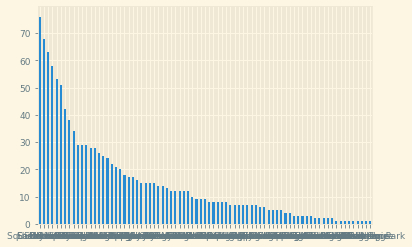

In [7]:
chart.plot.bar(rot = 0)

This graph is way too big! You can't even see the labels! For the sake of actually being able to read the graph, I decided to use the top five entries of the data table.

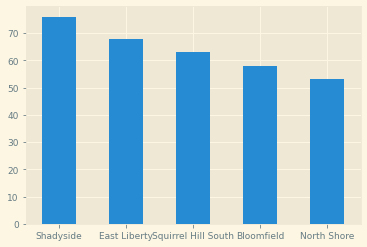

In [8]:
detailed = chart.head(5)
detailed.plot.bar(rot = 0)

Using the data from the graph, you see that according to how many smart trash cans each neighborhood has, the best neighborhood is Shadyside with 76 smart trash cans.